# Reproduction of Plots for WikiHoaxes project

In [22]:
import matplotlib.pyplot as plt
import pandas as pd
import pickle
from statistics import mean
import numpy as np
import statsmodels.stats.api as sms
import seaborn as sns
import copy
import random

## Data and Methods
### Figure 1
Summary of the number of hoaxes in the English
Wikipedia over time. A sharp decline can be observed around
2007–08, possibly due to the introduction of the ‘New Page
Patrol’ process in November 2007.

Loading hoaxes' creation dates...

Reading data/hoaxes/hoaxes_creation_dates.csv...
Success

Counting the frequency for each year...


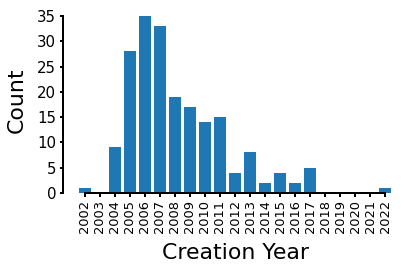

In [23]:
print("Loading hoaxes' creation dates...\n")

print("Reading data/hoaxes/hoaxes_creation_dates.csv...")
dates_df = pd.read_csv('data/hoaxes/hoaxes_creation_dates.csv')
print("Success\n")

print("Counting the frequency for each year...")
del(dates_df['hoax title'])
dates_df["creation date"] = dates_df['creation date'].astype('datetime64')
freq = dates_df.groupby(dates_df['creation date'].dt.year).count()

count = freq['creation date'].tolist()
years = list(freq.index)

fig = plt.figure()
ax = plt.subplot()

plt.bar(years, count)

ax.spines['left'].set_bounds(0,max(count))
ax.spines['bottom'].set_bounds(min(years), max(years))

for axis in ['right', 'top']:
    ax.spines[axis].set_visible(False)
    
for axis in ['left','bottom']:
    ax.spines[axis].set_linewidth(2)
    
ax.yaxis.set_tick_params(width=2)
ax.xaxis.set_tick_params(width=2)
plt.xticks(range(min(years),max(years)+1,1),fontsize =13, rotation = 90)
plt.yticks(range(0,max(count)+1,5),fontsize = 15)
plt.ylabel('Count', labelpad=10, fontsize = 22)
plt.xlabel('Creation Year', labelpad=10, fontsize = 22)

plt.tight_layout()
plt.show()

### Figure 2
Histogram of the number of legitimate articles created on the same day (cohort) as hoaxes in our dataset. Cohort size was computed with and without resolving redirects. Resolving redirects decreases the overall cohort size.

Loading cohort size data...

Reading data/cohorts/cohort_sizes.csv...
Success



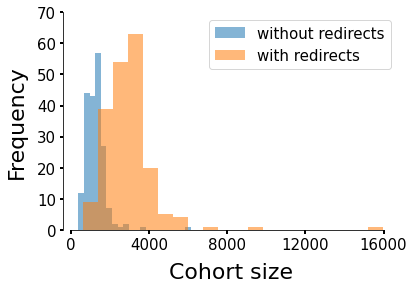

In [24]:
print("Loading cohort size data...\n")

print("Reading data/cohorts/cohort_sizes.csv...")
df_xr = pd.read_csv('data/cohorts/cohorts_sizes.csv')
print("Success\n")

fig = plt.figure()
ax = plt.subplot()

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

ax.spines['bottom'].set_bounds((0, 16000))
ax.spines['left'].set_bounds((0, 70))

ax.yaxis.set_tick_params(width=2)
ax.xaxis.set_tick_params(width=2)

n_xr, bins_xr, _ = plt.hist(df_xr['cohort size w/o redirects'],bins = 20, alpha=0.55, label='without redirects')
n_wr, bins_wr, _ = plt.hist(df_xr['cohort size w/ redirects'],bins = 20, alpha=0.55, label='with redirects')

plt.xlabel("Cohort size",labelpad = 10, fontsize = 22)
plt.ylabel("Frequency",labelpad = 10, fontsize = 22)
plt.xticks(range(0,16001,4000),fontsize = 15)
plt.yticks(range(0,71,10), fontsize = 15)
plt.legend(loc='upper right', fontsize = 15)

plt.show()

### Figure 3
Distribution of appearance features for five manually sampled cohorts in our data.

Loading appearance features' values...

Reading data/appearance_features/nonhoaxes/...
Success



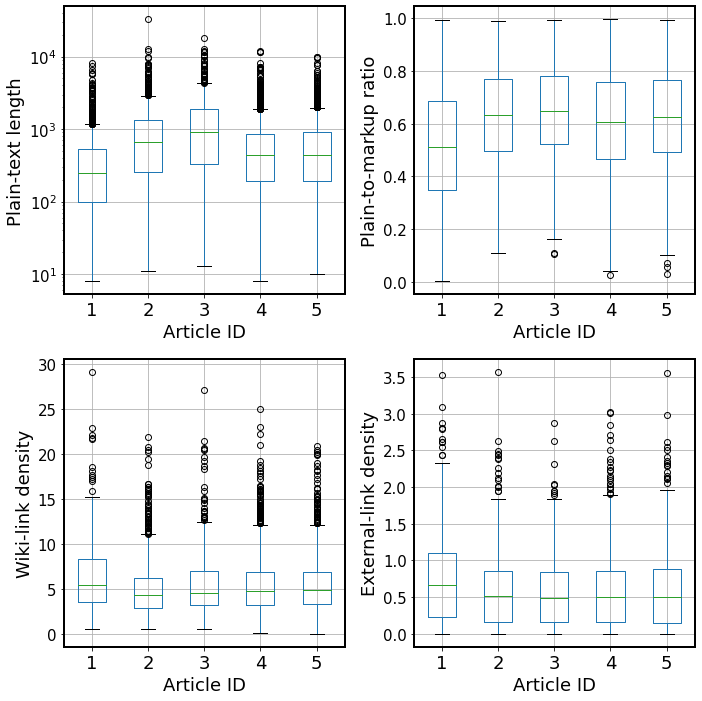

In [25]:
print("Loading appearance features' values...\n")

print("Reading data/appearance_features/nonhoaxes/...")
cohort_plain = pickle.load(open('data/appearance_features/nonhoaxes/cohort_plain.pickle', 'rb'))
cohort_pln2markup = pickle.load(open('data/appearance_features/nonhoaxes/cohort_pln2markup.pickle', 'rb'))
cohort_wlinkden = pickle.load(open('data/appearance_features/nonhoaxes/cohort_wlinkden.pickle', 'rb'))
cohort_extlinkden = pickle.load(open('data/appearance_features/nonhoaxes/cohort_extlinkden.pickle', 'rb'))
print("Success\n")

plain_df = pd.DataFrame.from_dict(cohort_plain, orient = 'index').transpose()
pln2markup_df = pd.DataFrame.from_dict(cohort_pln2markup, orient = 'index').transpose()
wlinkden_df = pd.DataFrame.from_dict(cohort_wlinkden, orient = 'index').transpose()
extlinkden_df = pd.DataFrame.from_dict(cohort_extlinkden, orient = 'index').transpose()
n = random.randint(0,len(plain_df.columns)-6) # picking 5 random hoaxes

plt.rc('font', size = 15)

fig, axs = plt.subplots(2,2, figsize = (10,10))

plain_df.boxplot(ax = axs[0,0], column = list(plain_df.columns)[n:n+5])
pln2markup_df.boxplot(ax = axs[0,1], column = list(pln2markup_df.columns)[n:n+5])
wlinkden_df.boxplot(ax = axs[1,0], column = list(wlinkden_df.columns)[n:n+5])
extlinkden_df.boxplot(ax = axs[1,1], column = list(extlinkden_df.columns)[n:n+5])

axs[0,0].set_yscale('log')
axs[0,0].set_ylabel("Plain-text length",  fontsize = 'large')
axs[0,1].set_ylabel("Plain-to-markup ratio",  fontsize = 'large')
axs[1,0].set_ylabel("Wiki-link density",  fontsize = 'large')
axs[1,1].set_ylabel("External-link density",  fontsize = 'large')
for ax in axs.ravel():
    ax.set_xticklabels(range(1,6), fontsize = 'large')
    ax.set_xlabel("Article ID", fontsize = 'large')
    for axis in ['top','bottom','left','right']:
        ax.spines[axis].set_linewidth(2)
plt.tight_layout()
plt.show()

# Results
### Figure 4
Modified 𝑧-scores for all hoaxes in our sample relative to non-hoax articles in their cohorts for the four appearance features we considered. Hoaxes tend to have similar or higher count of plain text words, lower external link density, higher plain to markup ratio, and similar wiki-link density

Loading appearance features' values...

Reading data/appearance_features/zscores.pickle...
Success



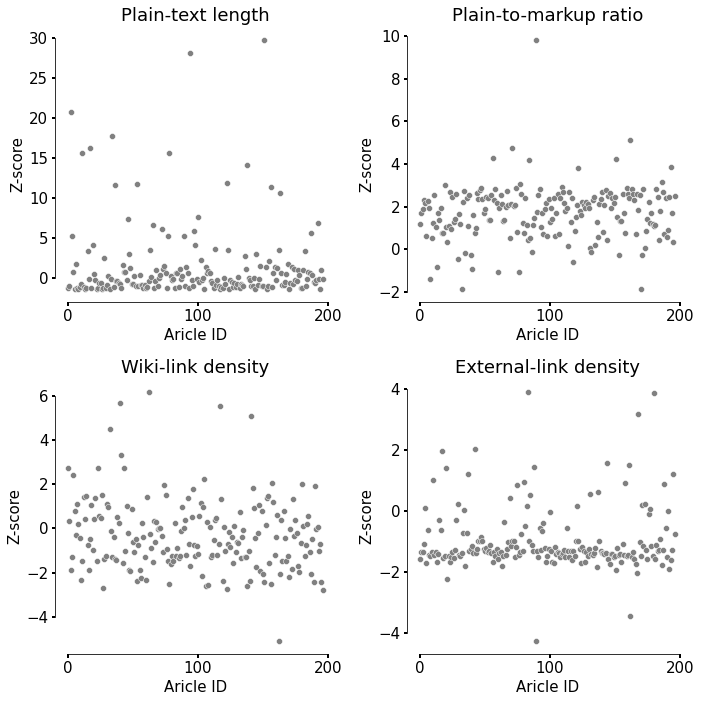

In [26]:
print("Loading appearance features' values...\n")

print("Reading data/appearance_features/zscores.pickle...")
z_scores = pickle.load(open('data/appearance_features/zscores.pickle', 'rb'))
print("Success\n")

zplain, zpl2mark, zwklnkden, zxtlnkden = ([] for i in range(4))
for i in range(len(z_scores)):
    zplain.append(list(z_scores.values())[i]['plain'])
    zpl2mark.append(list(z_scores.values())[i]['plain_to_markup'])
    zwklnkden.append(list(z_scores.values())[i]['wikilink_density'])
    zxtlnkden.append(list(z_scores.values())[i]['extlink_density'])    

fig, axs = plt.subplots(2,2, figsize = (10,10))

sns.scatterplot(ax = axs[0,0], data=zplain, color = 'grey').set(title = 'Plain-text length')
sns.scatterplot(ax = axs[0,1], data=zpl2mark, color = 'grey').set(title = 'Plain-to-markup ratio')
sns.scatterplot(ax = axs[1,0], data=zwklnkden, color = 'grey').set(title = 'Wiki-link density')
sns.scatterplot(ax = axs[1,1], data=zxtlnkden, color = 'grey').set(title = 'External-link density')

for ax in axs.ravel():
    for axis in ['right', 'top']:
        ax.spines[axis].set_visible(False)
    ax.set_ylabel('Z-score')
    ax.set_xlabel('Aricle ID')
    ax.set_xticks([0,100,200])
    ax.spines['bottom'].set_bounds((0,200))
    ax.xaxis.set_tick_params(width=2)
    ax.yaxis.set_tick_params(width=2)
    
axs[0,0].spines['left'].set_bounds(0, 30)
axs[0,1].spines['left'].set_bounds(-2,10)
axs[1,0].spines['left'].set_bounds(-4,6)
axs[1,1].spines['left'].set_bounds(-4,4)

plt.tight_layout()
plt.show()

### Figure 5
The distribution of the Δ𝑉/𝑉  values for each cohort in comparison to the Δ𝑉/𝑉 of the respective hoax. The Δ𝑉/𝑉 of hoaxes tend to, in general, be higher than the mean of their cohorts.

Reading the Δ𝑉/𝑉 values for hoaxes and their cohorts...

Reading data/relative_volumes/relative_volumes.p...
Success



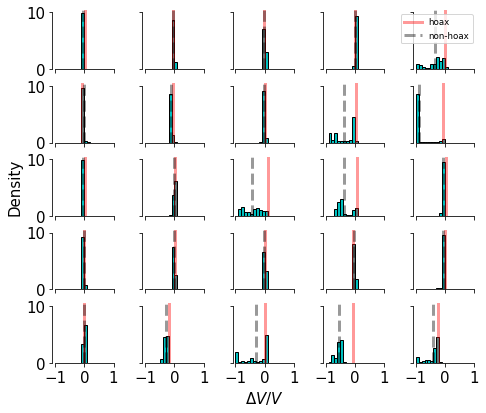

In [28]:
print("Reading the Δ𝑉/𝑉 values for hoaxes and their cohorts...\n")
print("Reading data/relative_volumes/relative_volumes.p...")
cohort_dict = pickle.load(open('data/relative_volumes/relative_volumes.p', 'rb'))
print("Success\n")

# plotting histograms of the ΔV/V values of nonhoaxes vs hoax
key_list = list(cohort_dict.keys())

fig, axs = plt.subplots(5,5,sharex=True, sharey=True, figsize = (7,6))

for ax, key in zip(axs.ravel(), key_list):
    
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)

    ax.spines['bottom'].set_bounds((-1, 1))
    ax.spines['left'].set_bounds(0,10)
    
    ax.hist(cohort_dict[key]['nonhoax_relative_vol']
             , density = True, range = (-1,1), bins = 20
             , color='c', edgecolor='k')
    ax.axvline(cohort_dict[key]['hoax_relative_vol']
                , color='r', linewidth=3, label = 'hoax', alpha = 0.4)
    ax.axvline(mean(cohort_dict[key]['nonhoax_relative_vol'])
                , color='k',linestyle='dashed', linewidth=3, label = 'non-hoax', alpha = 0.4)
    for spine in ax.spines.values():
        spine.set_color("black")
        
        
axs[4][2].set_xlabel(r'$\Delta V / V$',  fontsize = 'medium')
axs[2][0].set_ylabel('Density', fontsize = 'medium')
axs[0][4].legend(loc="upper right", fontsize = 'xx-small')

plt.tight_layout(h_pad = 0.1)
plt.show()

### Figure 6
Histogram of the relative traffic change differences 𝐷 (see Equation (3) in the paper). The black dashed line is the sample mean, and the red area the 95% bootstrapped CI. The blue solid line is a kernel density estimate. The inset shows the sample mean relative to the confidence interval.

Calculating D values (ΔV/V of hoax - mean ΔV/V of respective cohort)...
Mean of D:  0.123120860036437 

Bootstrapping the list of (D) with replacement 10,000 times...

Calculating the bootstrapped 95% CI...
95% CI:  (0.12267822917242964, 0.12345892161123777)


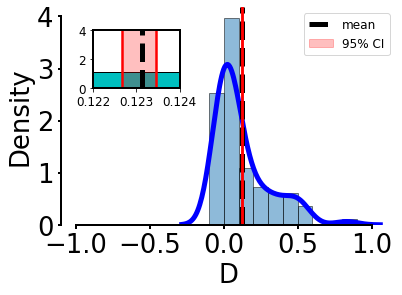

In [29]:
print("Calculating D values (ΔV/V of hoax - mean ΔV/V of respective cohort)...")
means_diff = []
for key, value in cohort_dict.items():
    means_diff.append(value['hoax_relative_vol'] - mean(value['nonhoax_relative_vol']))
print("Mean of D: ", mean(means_diff) , '\n')
    
print("Bootstrapping the list of (D) with replacement 10,000 times...\n")
new_samples = []
for _ in range(10000):
    vector = np.random.choice(means_diff, size=83, replace=True) # set the seed of the random number here
    new_samples.append(vector.mean())
    
print("Calculating the bootstrapped 95% CI...")
mean_conf = sms.DescrStatsW(new_samples).tconfint_mean()
print("95% CI: ", mean_conf)


fig = plt.figure()
ax = plt.subplot()

plt.hist(means_diff,  range = (-1,1)
         , density = True, bins = 20, edgecolor='black', alpha = 0.5)
sns.kdeplot(means_diff, color = 'blue')
plt.ylabel('Density', fontsize = 'xx-large')
plt.xlabel('D', fontsize = 'xx-large')
plt.axvline(mean(means_diff), color='black', linestyle = 'dashed', linewidth=5, label = 'mean')
plt.axvline(mean_conf[0], color='red', linewidth=2.5)
plt.axvline(mean_conf[1], color='red', linewidth=2.5)
plt.axvspan(mean_conf[0], mean_conf[1], alpha = 0.25, color = 'red', label = '95% CI')
plt.xticks(fontsize = 'xx-large')
plt.yticks(fontsize = 'xx-large')

ax2 = fig.add_axes([0.2, 0.6, 0.2, 0.2])
ax2.axis([0.122, 0.124, 0, 4])
ax2.set_yticks([0, 2, 4])
ax2.set_xticks([0.122, 0.123, 0.124])

ax2.hist(means_diff,  range = (-1,1)
         , density = True, bins = 20
         , color='c', edgecolor='k')
plt.axvline(mean(means_diff), color='black', linestyle = 'dashed', linewidth=5, label = 'mean')
plt.axvline(mean_conf[0], color='red', linewidth=2.5)
plt.axvline(mean_conf[1], color='red', linewidth=2.5)
plt.axvspan(mean_conf[0], mean_conf[1], alpha = 0.25, color = 'red', label = '95% CI')
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)

ax.legend(fontsize = 12)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

ax.spines['bottom'].set_bounds((-1, 1))
ax.set_xticks([-1,-0.5,0,0.5,1])

ax.spines['left'].set_bounds(0,4)

for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(2)
    ax2.spines[axis].set_linewidth(2)

ax.yaxis.set_tick_params(width=2)
ax.xaxis.set_tick_params(width=2)

plt.show()

### Figure 7
Sampling the distribution of means through bootstrapping 10000 samples with replacement.

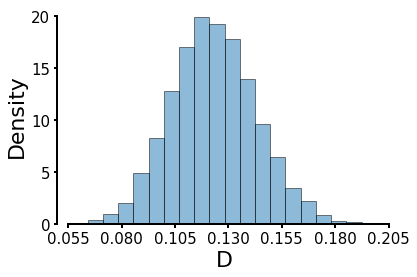

In [30]:
# plotting histogram for the bootstrapped samples
fig = plt.figure()
ax = plt.subplot()

for axis in ['right', 'top']:
    ax.spines[axis].set_visible(False)
    
for axis in ['bottom','left']:
    ax.spines[axis].set_linewidth(2)
    
ax.spines['bottom'].set_bounds((0.055, 0.205))
ax.set_xticks([0.055,0.080,0.105,0.130,0.155,0.180,0.205])

ax.spines['left'].set_bounds(0,20)

ax.yaxis.set_tick_params(width=2)
ax.xaxis.set_tick_params(width=2)

plt.hist(new_samples, density = True , bins = 20, edgecolor = 'black', alpha = 0.5)

plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.ylabel('Density', fontsize = 22)
plt.xlabel('D', fontsize = 22)

plt.show()
